In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for encoding
from sklearn.preprocessing import LabelEncoder

#for train test splitting
from sklearn.model_selection import train_test_split

#for decision tree object
from sklearn.tree import DecisionTreeClassifier

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix

#for visualizing tree 
from sklearn.tree import plot_tree

In [2]:
# to know all the available dataset
# sns.get_dataset_names()

In [3]:
# reading the data from presets
# df = sns.load_dataset('iris')
# df.head()

In [23]:
# Reading the data from files
df = pd.read_csv('houses.csv')
df.head()

,city,bath,beds,year_built,elevation,sqft,price,price_per_sqft
0,San Francisco,2.0,3.0,1908,55,1546,1389000,898
1,New York,2.0,2.0,1900,9,2150,1350000,628
2,San Francisco,2.0,2.0,2007,7,808,779000,964
3,New York,2.0,2.0,2004,10,957,1635000,1708
4,San Francisco,2.5,3.0,1928,160,1905,1388000,729


In [24]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            250 non-null    object 
 1   bath            250 non-null    float64
 2   beds            250 non-null    float64
 3   year_built      250 non-null    int64  
 4   elevation       250 non-null    int64  
 5   sqft            250 non-null    int64  
 6   price           250 non-null    int64  
 7   price_per_sqft  250 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 15.8+ KB


In [25]:
df.isnull().any()

city              False
bath              False
beds              False
year_built        False
elevation         False
sqft              False
price             False
price_per_sqft    False
dtype: bool

In [26]:
df.shape

(250, 8)

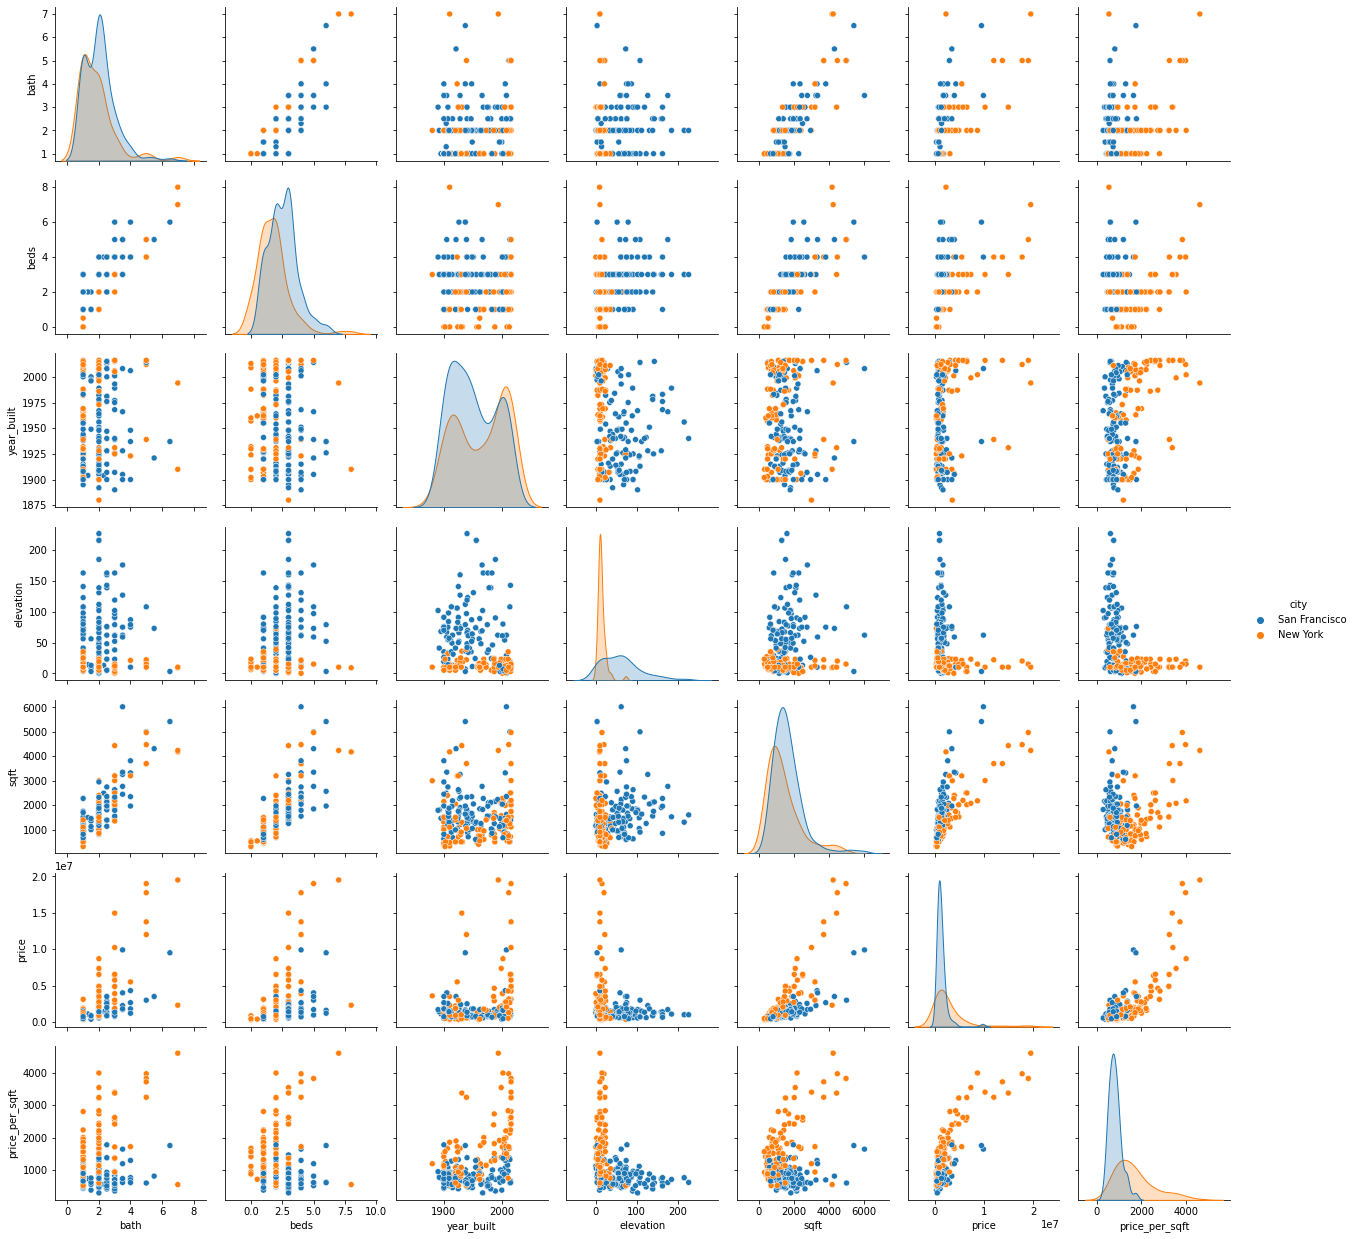

In [27]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'city')
plt.savefig("pne.png")

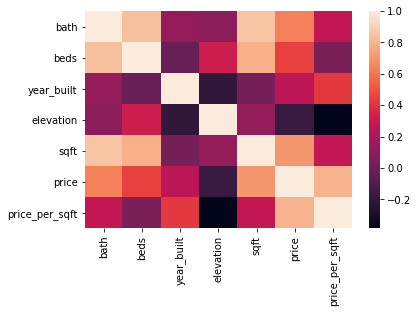

In [28]:
# correlation matrix
sns.heatmap(df.corr())
plt.savefig("one.png")

In [29]:
target = df['city']
df1 = df.copy()
df1 = df1.drop('city', axis =1)
df1.shape

(250, 7)

In [30]:
df1.head()

,bath,beds,year_built,elevation,sqft,price,price_per_sqft
0,2.0,3.0,1908,55,1546,1389000,898
1,2.0,2.0,1900,9,2150,1350000,628
2,2.0,2.0,2007,7,808,779000,964
3,2.0,2.0,2004,10,957,1635000,1708
4,2.5,3.0,1928,160,1905,1388000,729


In [31]:
# Defining the attributes
X = df1

In [32]:
target

0      San Francisco
1           New York
2      San Francisco
3           New York
4      San Francisco
           ...      
245         New York
246         New York
247    San Francisco
248    San Francisco
249    San Francisco
Name: city, Length: 250, dtype: object

In [33]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1])

In [34]:
y = target

In [35]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (200, 7)
Testing split input-  (50, 7)


In [36]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [37]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.63      0.95      0.76        20
           1       0.95      0.63      0.76        30

    accuracy                           0.76        50
   macro avg       0.79      0.79      0.76        50
weighted avg       0.82      0.76      0.76        50



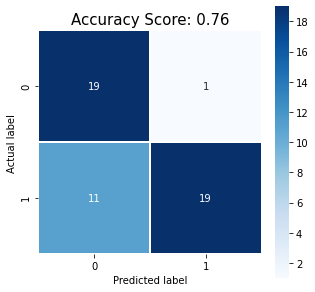

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

In [39]:
cm

array([[19,  1],
       [11, 19]])

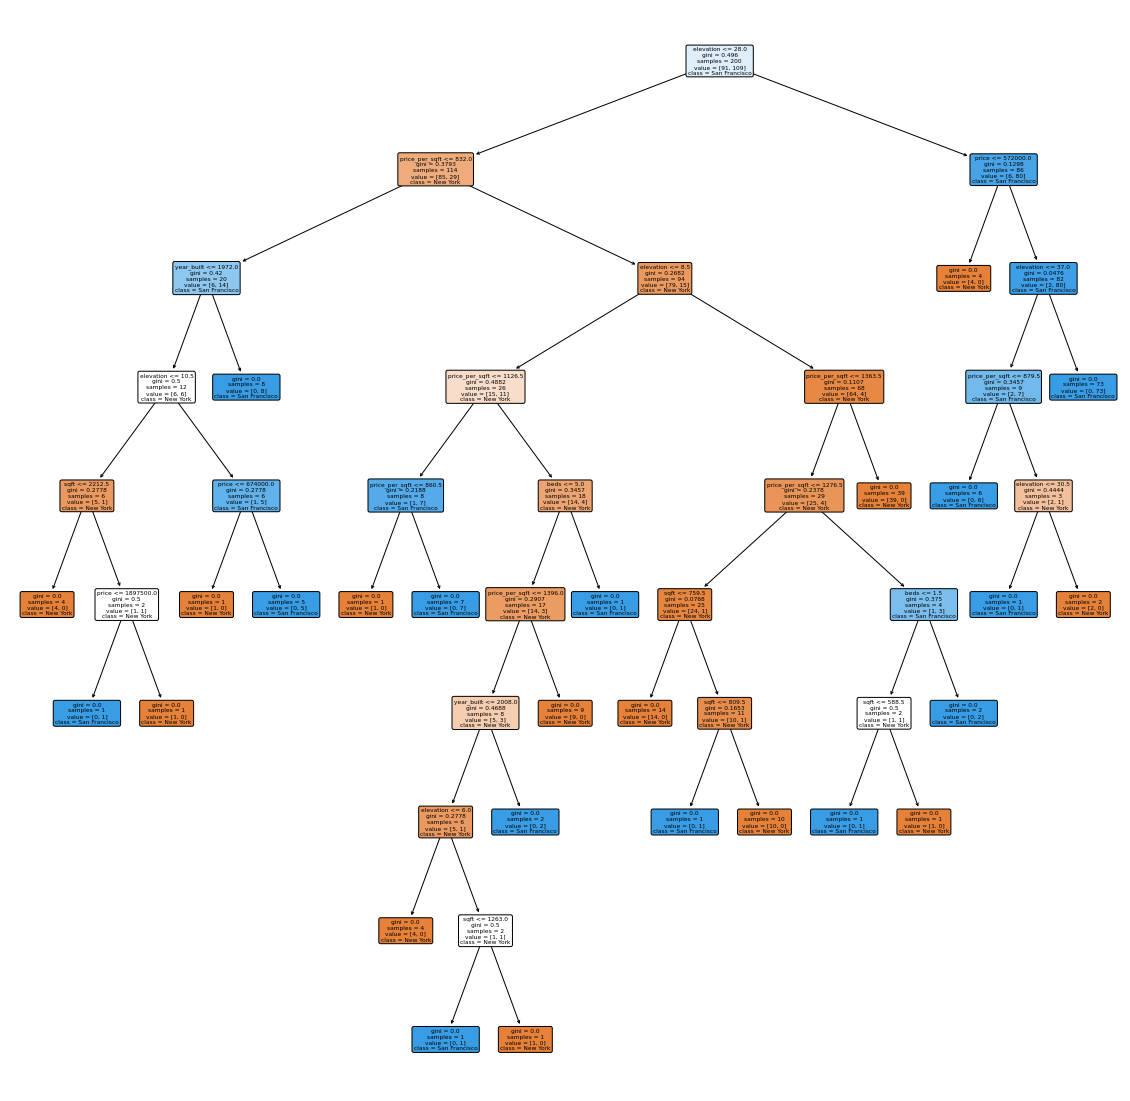

In [41]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["New York", "San Francisco"] , filled = True , precision = 4, rounded = True)

plt.savefig("one.png")